In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'svg'
config = {'font.family': 'Times New Roman',
          'font.size': 15,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'mathtext.fontset': 'stix',
         }
plt.rcParams.update(config)

scenario = "B"

results = np.load(f"./output/{scenario}/results.npy").reshape(181, 30, 100, 400) # 时刻 种类
n = np.load(f"./output/{scenario}/results_porosity.npy").reshape(181, 100, 400)
K = np.load(f"./output/{scenario}/results_K.npy").reshape(181, 100, 400)
K_log = np.log(K)

print(results.shape)
print(n.shape)
print(K.shape)
# print(heads.shape)

# ['0 K' '1 Na' '2 Ca' '3 Mg' '4 Li' '5 Cl' '6 S(6)' '7 C(4)' '8 Halite'
#  '9 Carnallite' '10 Polyhalite' '11 Sylvite' '12 Gypsum' '13 Calcite' '14 Dolomite'
#  '15 d_Halite' '16 d_Carnallite' '17 d_Polyhalite' '18 d_Sylvite' '19 d_Gypsum' '20 d_Calcite' '21 d_Dolomite'
#  '22 density(kg/m3)'
#  '23 SI_Halite' '24 SI_Carnallite' '25 SI_Polyhalite' '26 SI_Sylvite' '27 SI_Gypsum' '28 SI_Calcite' '29 SI_Dolomite']

(181, 30, 100, 400)
(181, 100, 400)
(181, 100, 400)


0.0001000014921084258
269.11347722396494


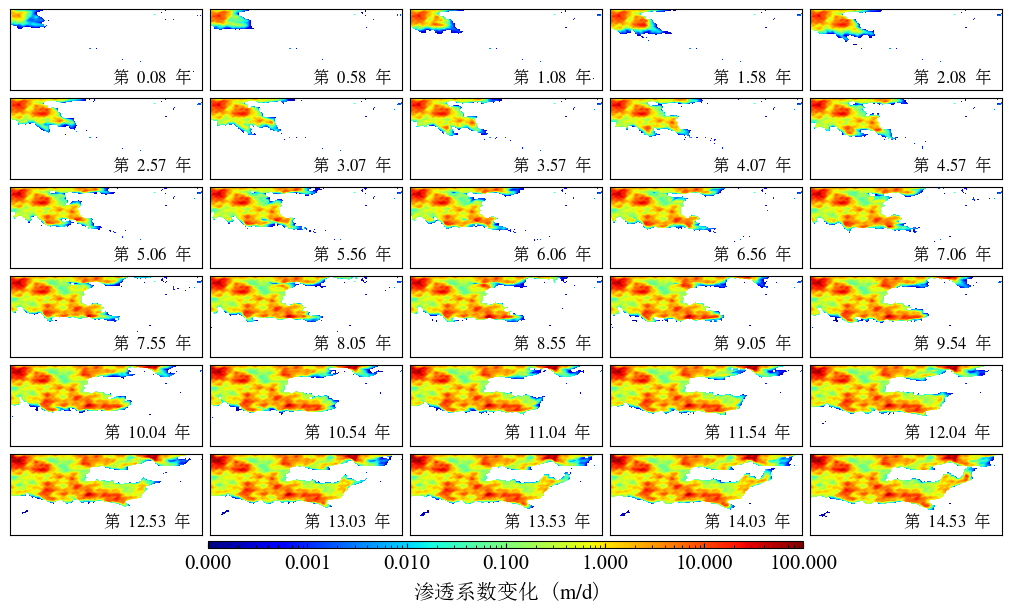

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

data_to_plot_percent = [(K[i, :, :] - K[0, :, :]) for i in range(1, 181, 6)]

data_to_plot_log = []
for arr_percent in data_to_plot_percent:
    mask = (arr_percent <= 0) | (arr_percent < 1e-4)
    masked_arr = np.ma.array(arr_percent, mask=mask)
    data_to_plot_log.append(masked_arr)

all_positive_values = np.concatenate([arr.compressed() for arr in data_to_plot_log])

if len(all_positive_values) > 0:
    log_vmin = np.min(all_positive_values)
    log_vmax = np.max(all_positive_values)
    if log_vmin < 1e-4:
        log_vmin = 1e-4
else:
    log_vmin = 1e-4
    log_vmax = 1.0

if log_vmin >= log_vmax:
    log_vmax = log_vmin * 10
print(log_vmin)
print(log_vmax)
log_vmin = 0.0001
log_vmax = 100.0
n_rows, n_cols = 6, 5
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(10, 6),
    constrained_layout=True    # <— 打开 constrained_layout
)
axes = axes.flatten()
time_points = list(range(1, 181, 6))

for idx, arr_log in enumerate(data_to_plot_log):
    ax = axes[idx]
    norm = LogNorm(vmin=log_vmin, vmax=log_vmax)
    mappable = ax.imshow(arr_log, cmap="jet", norm=norm, aspect='auto')
    # ax.set_title(f'K[{idx*2+1}] - K[0] (%)')
    ax.set_xticks([])
    ax.set_yticks([])

    # 计算当前时刻对应的年
    t = time_points[idx]
    year = t * 0.083

    ax.text(
        0.95, 0.05,
        f'第 ${year:.2f}$ 年',
        transform=ax.transAxes,
        fontdict={'family': 'SimSun'},
        ha='right', va='bottom',
        fontsize=12,
        # color='white',
    )

for ax in axes[len(data_to_plot_log):]:
    fig.delaxes(ax)

cbar = fig.colorbar(
    mappable,
    ax=axes[:len(data_to_plot_log)].tolist(),
    location='bottom',
    pad=0.01,
    aspect=80,
    format='%.3f',
    shrink=0.6
)
cbar.set_label(r'渗透系数变化 ($\mathrm{m/d}$)', fontdict={'family': 'SimSun'})
plt.show()

In [27]:
data_to_plot_percent = np.array(data_to_plot_percent).reshape(30, 40000)
data_to_plot_percent.mean(1).shape

(30,)

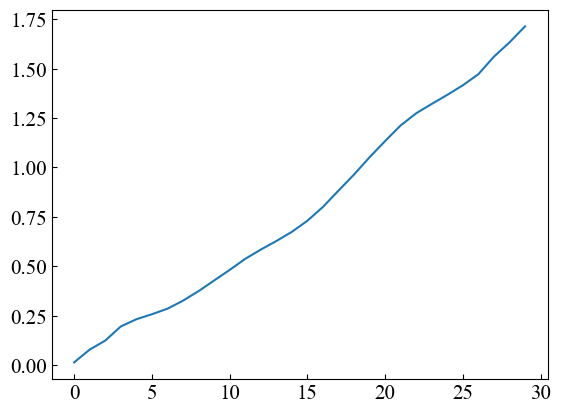

In [28]:
plt.plot(data_to_plot_percent.mean(1))

0.00010000240535656957
163.12300454885172


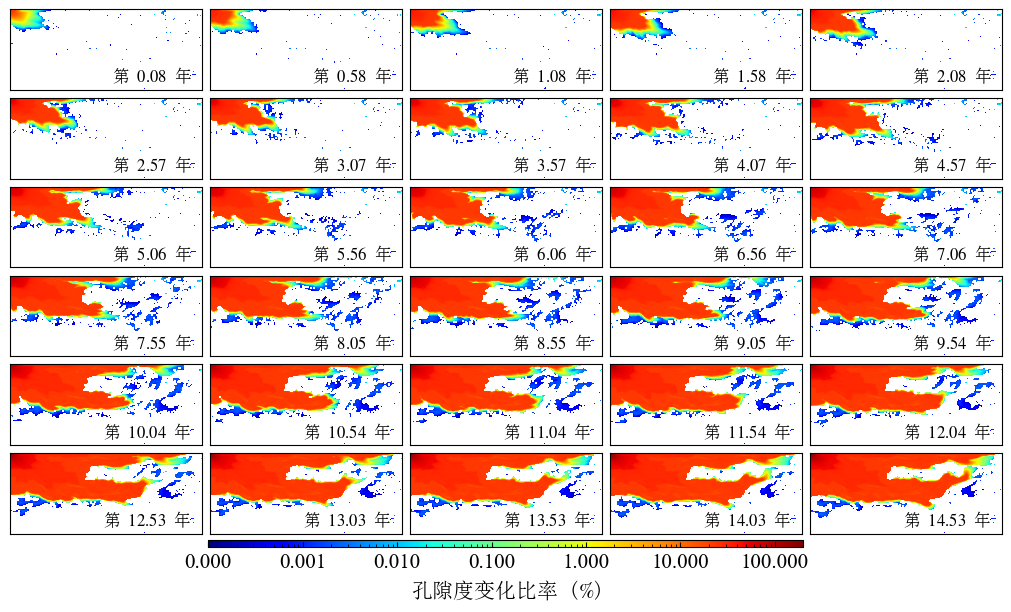

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

data_to_plot_percent = [(n[i, :, :] - n[0, :, :]) / n[0, :, :] * 100 for i in range(1, 181, 6)]

data_to_plot_log = []
for arr_percent in data_to_plot_percent:
    mask = (arr_percent <= 0) | (arr_percent < 1e-4)
    masked_arr = np.ma.array(arr_percent, mask=mask)
    data_to_plot_log.append(masked_arr)

all_positive_values = np.concatenate([arr.compressed() for arr in data_to_plot_log])

if len(all_positive_values) > 0:
    log_vmin = np.min(all_positive_values)
    log_vmax = np.max(all_positive_values)
    if log_vmin < 1e-4:
        log_vmin = 1e-4
else:
    log_vmin = 1e-4
    log_vmax = 1.0

if log_vmin >= log_vmax:
    log_vmax = log_vmin * 10
print(log_vmin)
print(log_vmax)
log_vmin = 0.0001
log_vmax = 200.0
n_rows, n_cols = 6, 5
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(10, 6),
    constrained_layout=True    # <— 打开 constrained_layout
)
axes = axes.flatten()
time_points = list(range(1, 181, 6))

for idx, arr_log in enumerate(data_to_plot_log):
    ax = axes[idx]
    norm = LogNorm(vmin=log_vmin, vmax=log_vmax)
    mappable = ax.imshow(arr_log, cmap="jet", norm=norm, aspect='auto')
    # ax.set_title(f'K[{idx*2+1}] - K[0] (%)')
    ax.set_xticks([])
    ax.set_yticks([])

    # 计算当前时刻对应的年
    t = time_points[idx]
    year = t * 0.083

    ax.text(
        0.95, 0.05,
        f'第 ${year:.2f}$ 年',
        transform=ax.transAxes,
        fontdict={'family': 'SimSun'},
        ha='right', va='bottom',
        fontsize=12,
        # color='white',
    )

for ax in axes[len(data_to_plot_log):]:
    fig.delaxes(ax)

cbar = fig.colorbar(
    mappable,
    ax=axes[:len(data_to_plot_log)].tolist(),
    location='bottom',
    pad=0.01,
    aspect=80,
    format='%.3f',
    shrink=0.6
)

cbar.set_label(r'孔隙度变化比率 ($\mathrm{\%}$)', fontdict={'family': 'SimSun'})

plt.show()

In [ ]:
data_to_plot_percent = np.array(data_to_plot_percent).reshape(30, 40000)
data_to_plot_percent.mean(1).shape

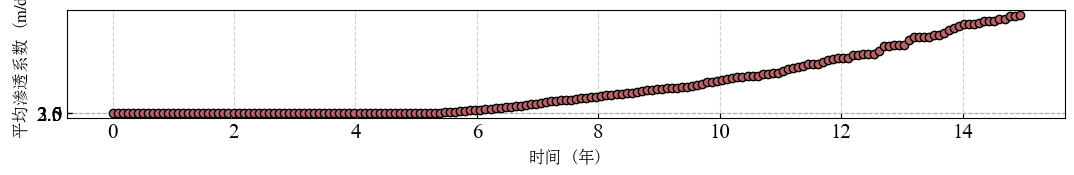

In [18]:
time_steps = K.shape[0]
mean_values = [np.mean(K[i, :, :]) for i in range(time_steps)]

time_years = np.arange(time_steps) * 0.083

plt.figure(figsize=(11,2))
plt.plot(time_years, 
         mean_values, 
         marker='o', 
         linewidth=2,
         color='#b86366', 
         markersize=6, 
         markeredgecolor='black', 
         linestyle='-',
)
plt.yticks([2.0, 2.5, 3.0, 3.5])
plt.xlabel("时间 (年)", fontdict={'family': 'SimSun', 'size': 12})
plt.ylabel(r"平均渗透系数 ($\mathrm{m/d}$)", fontdict={'family': 'SimSun', 'size': 12})

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


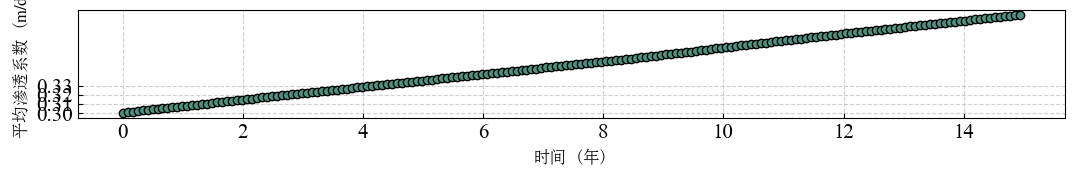

In [19]:
time_steps = n.shape[0]
mean_values = [np.mean(n[i, :, :]) for i in range(time_steps)]

time_years = np.arange(time_steps) * 0.083

plt.figure(figsize=(11,2))
plt.plot(time_years, 
         mean_values, 
         marker='o', 
         linewidth=2,
         color='#4e9381', 
         markersize=6, 
         markeredgecolor='black', 
         linestyle='-',
)
plt.yticks([0.30, 0.31, 0.32, 0.33])
plt.xlabel("时间 (年)", fontdict={'family': 'SimSun', 'size': 12})
plt.ylabel(r"平均渗透系数 ($\mathrm{m/d}$)", fontdict={'family': 'SimSun', 'size': 12})

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
